### Steps:

1. Calculate posterior probability from prior, marginal likelihood and likelihood for group1
2. Calculate posterior probability from prior, marginal likelihood and likelihood for group2
3. Compare the two probability and assign the class


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
# Data preprocessing
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
X = data.iloc[:,2:4].values
y = data.iloc[:,-1:].values

# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Scale the variable
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


How are we gonna make use of Age and Salary to predict whether the customer will purchase the product or not.

Goal: Posterior P(purchase|(Age, Salary)) v.s., P(not purchase|(Age, Salary))

P(p|A,S) = P(A,S|p) * P(p)  = P(A|p)P(B|p)P(p)  (The approximation from P(A|p)P(B|p) to P(A,B|p) is the naive bayes assumption)


In [8]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

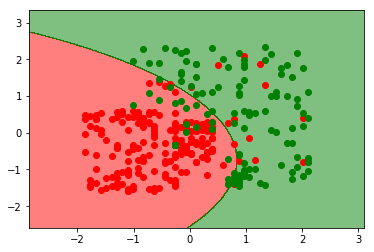

In [18]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01), np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, nb_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('Red','Green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.where(y_set==i),0], X_set[np.where(y_set==i),1], c=ListedColormap(('Red', 'Green'))(i))

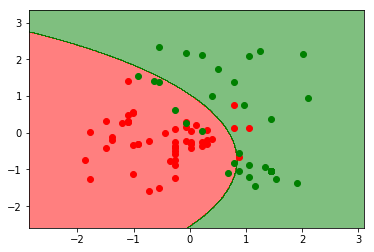

In [19]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01), np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, nb_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('Red','Green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.where(y_set==i),0], X_set[np.where(y_set==i),1], c=ListedColormap(('Red', 'Green'))(i))